# Params - Loc

In [3]:
# import the pandas data analysis library and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

n_sketches_created = 14542
n_sketches_hearted = 14196
n_sketches_total = n_sketches_created + n_sketches_hearted

In [4]:
def scatter_plot(df, var_name, title, ticks=[]):
    data = df[var_name]
    mean = df[var_name].mean()
    std = df[var_name].std()
    min_value = min(data)
    max_value = max(data)
    
    plt.title(title)
    plt.scatter(x=df.index, y=df[var_name], s=0.5)
    plt.hlines(y=mean, xmin=0, xmax=len(data),  colors='y')
    
    if std > 0:
        if (mean - std) > min_value:
            plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')

        if (mean + std) < max_value:
            plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

        if (mean - 2*std) > min_value:
            plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')

        if (mean + 2*std) < max_value:
            plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')
    
    #hide x-axis
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    
    if ticks:
        plt.yticks(ticks)

    plt.show()

In [5]:
def scatter_plot_top_limit(df, var_name, title, limit, ticks=[]):
    data = df[var_name]
    mean = df[var_name].mean()
    std = df[var_name].std()
    min_value = min(data)
    max_value = max(data)
    
    ndata = df[ (df[var_name] < limit)][var_name]
    
    plt.title(title)
    plt.scatter(x=ndata.index, y=ndata, s=0.5)
    plt.hlines(y=mean, xmin=0, xmax=len(data),  colors='y')
    
    if std > 0:
        if (mean - std) > min_value:
            plt.hlines(y=mean - std, xmin=0, xmax=len(data), colors='r')

        if (mean + std) < limit:
            plt.hlines(y=mean + std, xmin=0, xmax=len(data), colors='r')

        if (mean - 2*std) > min_value:
            plt.hlines(y=mean - 2*std, xmin=0, xmax=len(data), colors='g')

        if (mean + 2*std) < limit:
            plt.hlines(y=mean + 2*std, xmin=0, xmax=len(data), colors='g')
    
    #hide x-axis
    ax = plt.gca()
    ax.get_xaxis().set_visible(False)
    
    if ticks:
        plt.yticks(ticks)

    plt.show()

In [6]:
# df_demo_mod = pd.read_csv("../demo_loc_param_module.csv", index_col=0)
# df_demo_mod

In [7]:
# df_demo_func.describe().round(2)

In [8]:
# scatter_plot(df_demo_mod, 'sloc_physical_mod_list', "SLOC PH test func")

## Modules

### Created

In [9]:
df_created_module = pd.read_csv("../analysis/cr/csvs/created_loc_param_module.csv", index_col=0)
df_created_module

,sloc_physical_mod_list,sloc_logical_mod_list,param_mod_list
0,59,10,0
1,53,53,26
2,101,67,0
3,1,0,0
4,39,31,0
...,...,...,...
12004,78,57,0
12005,46,17,0
12006,133,102,2
12007,16,12,0


In [8]:
# df_created_module = df_created_module[df_created_module.sloc_physical_mod_list >= 2400]
# df_created_module["sloc_physical_mod_list"]

In [11]:
q_75 = df_created_module["sloc_physical_mod_list"].quantile(.75)
# col_data.describe()
q_75

87.0

In [12]:
df_created_module.describe().round(2)

,sloc_physical_mod_list,sloc_logical_mod_list,param_mod_list
count,12009.00,12009.00,12009.00
mean,87.67,61.36,2.86
std,447.41,264.66,42.12
min,1.00,0.00,0.00
25%,21.00,11.00,0.00
50%,43.00,23.00,0.00
75%,87.00,50.00,0.00
max,29837.00,13492.00,3296.00


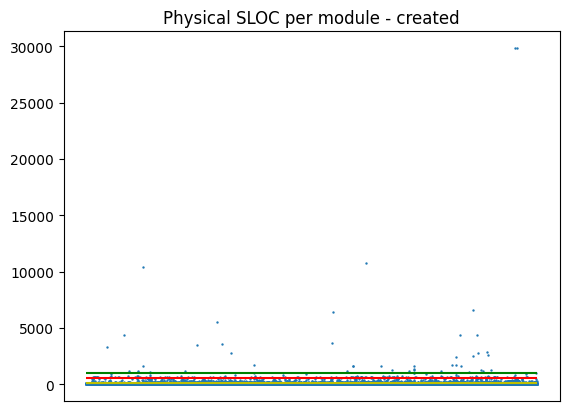

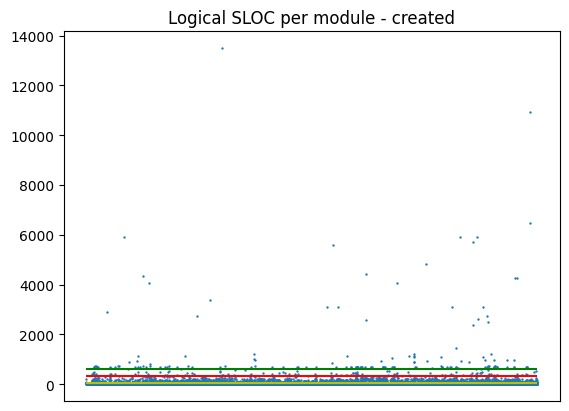

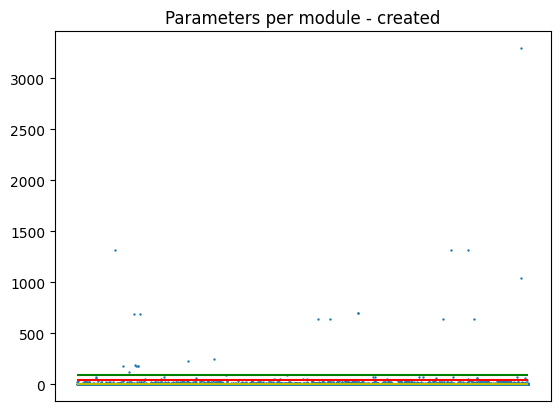

In [13]:
scatter_plot(df_created_module, 'sloc_physical_mod_list', "Physical LOC per module - created")
scatter_plot(df_created_module, 'sloc_logical_mod_list', "Logical LOC per module - created")
scatter_plot(df_created_module, 'param_mod_list', "Parameters per module - created")

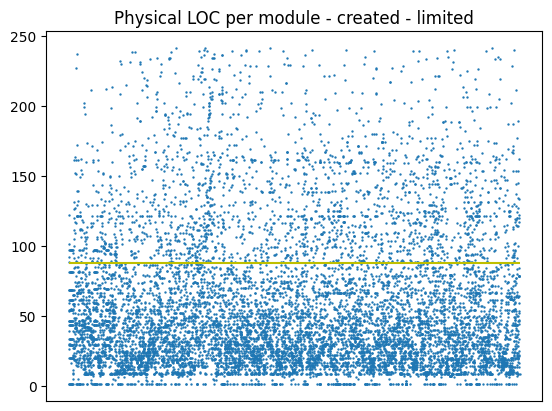

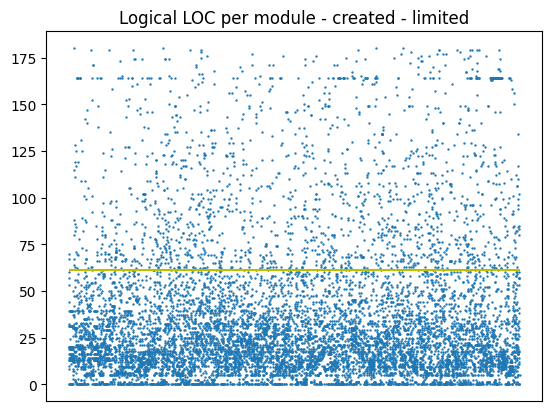

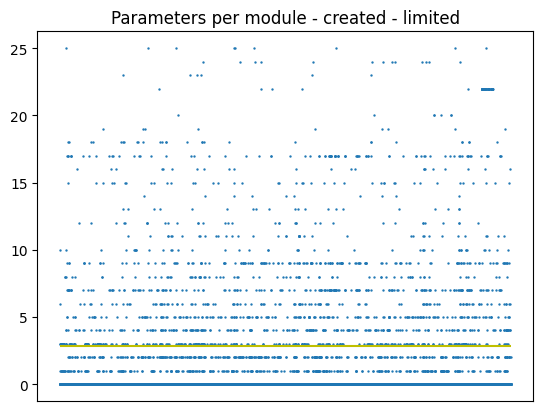

In [101]:
limit_phys_loc = round(df_created_module["sloc_physical_mod_list"].quantile(0.95))
limit_log_loc = round(df_created_module["sloc_logical_mod_list"].quantile(0.95))
limit_param = round(df_created_module["param_mod_list"].quantile(0.99))

scatter_plot_top_limit(df_created_module, 'sloc_physical_mod_list', "Physical LOC per module - created - limited", limit=limit_phys_loc)
scatter_plot_top_limit(df_created_module, 'sloc_logical_mod_list', "Logical LOC per module - created - limited", limit=limit_log_loc)
scatter_plot_top_limit(df_created_module, 'param_mod_list', "Parameters per module - created - limited", limit=limit_param)


### Hearted

In [28]:
df_hearted_module = pd.read_csv("../analysis/cr/csvs/hearted_loc_param_module.csv", index_col=0)
df_hearted_module

,sloc_physical_mod_list,sloc_logical_mod_list,param_mod_list
0,119,87,9
1,53,37,0
2,422,207,0
3,310,189,28
4,121,62,0
...,...,...,...
11561,78,57,0
11562,1978,0,0
11563,78,57,0
11564,44,17,0


In [29]:
df_hearted_module.describe().round(2)

,sloc_physical_mod_list,sloc_logical_mod_list,param_mod_list
count,11566.00,11566.00,11566.00
mean,141.76,92.45,7.09
std,655.62,625.40,72.53
min,1.00,0.00,0.00
25%,42.00,19.00,0.00
50%,76.00,42.00,0.00
75%,128.00,75.00,4.00
max,47549.00,34121.00,3296.00


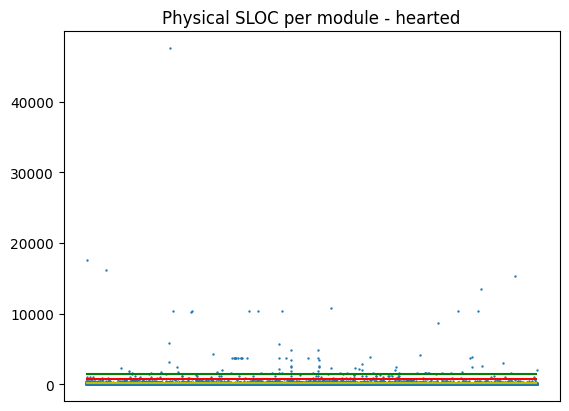

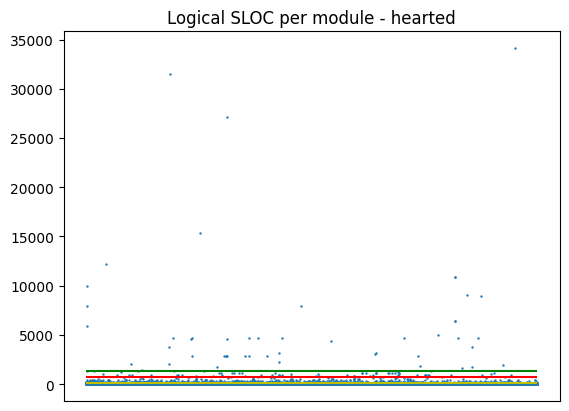

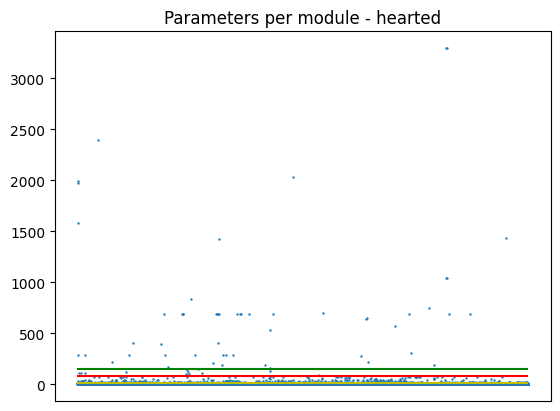

In [119]:
scatter_plot(df_hearted_module, 'sloc_physical_mod_list', "Physical SLOC per module - hearted")
scatter_plot(df_hearted_module, 'sloc_logical_mod_list', "Logical SLOC per module - hearted")
scatter_plot(df_hearted_module, 'param_mod_list', "Parameters per module - hearted")

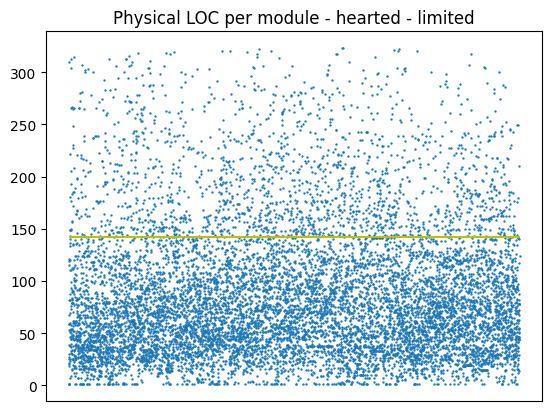

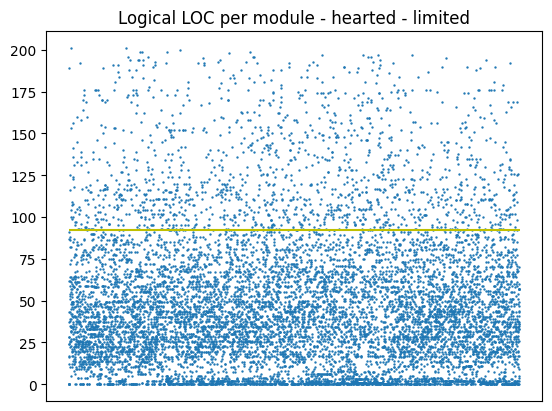

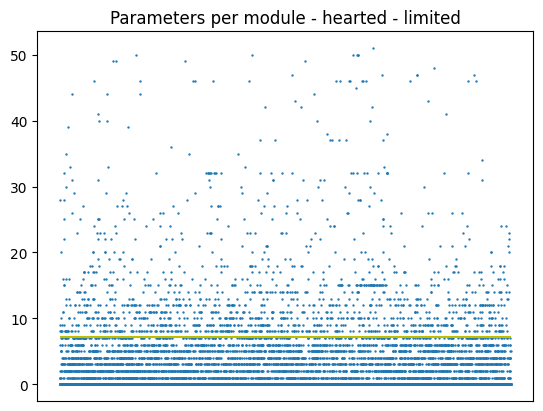

In [120]:
limit_phys_loc = round(df_hearted_module["sloc_physical_mod_list"].quantile(0.95) )
limit_log_loc = round(df_hearted_module["sloc_logical_mod_list"].quantile(0.95))
limit_param = round(df_hearted_module["param_mod_list"].quantile(0.99))

scatter_plot_top_limit(df_hearted_module, 'sloc_physical_mod_list', "Physical LOC per module - hearted - limited", limit=limit_phys_loc)
scatter_plot_top_limit(df_hearted_module, 'sloc_logical_mod_list', "Logical LOC per module - hearted - limited", limit=limit_log_loc)
scatter_plot_top_limit(df_hearted_module, 'param_mod_list', "Parameters per module - hearted - limited", limit=limit_param)

### Total

In [35]:
df_total_module = pd.read_csv("../analysis/cr/csvs/total_loc_param_module.csv", index_col=0)
df_total_module

,sloc_physical_mod_list,sloc_logical_mod_list,param_mod_list
0,59,10,0
1,53,53,26
2,101,67,0
3,1,0,0
4,39,31,0
...,...,...,...
23570,78,57,0
23571,1978,0,0
23572,78,57,0
23573,44,17,0


In [36]:
df_total_module.describe().round(2)

,sloc_physical_mod_list,sloc_logical_mod_list,param_mod_list
count,23575.00,23575.00,23575.00
mean,114.21,76.61,4.94
std,559.97,477.28,59.07
min,1.00,0.00,0.00
25%,29.00,13.00,0.00
50%,58.00,31.00,0.00
75%,110.00,64.00,2.00
max,47549.00,34121.00,3296.00


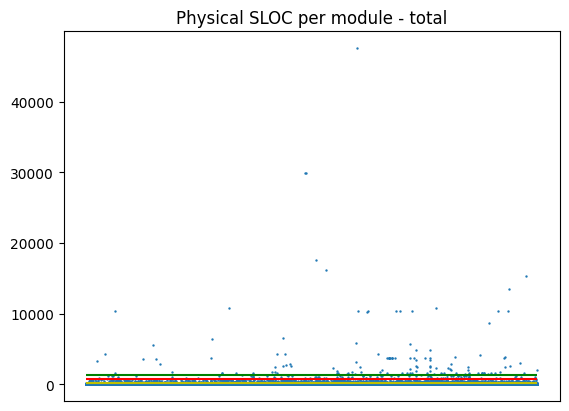

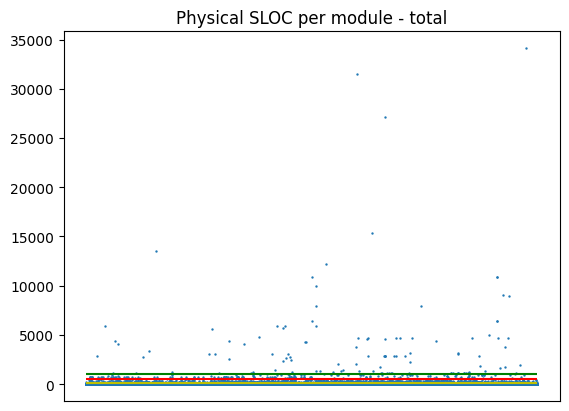

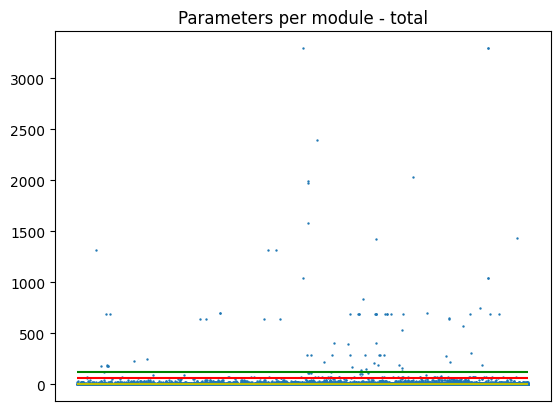

In [37]:
scatter_plot(df_total_module, 'sloc_physical_mod_list', "Physical SLOC per module - total")
scatter_plot(df_total_module, 'sloc_logical_mod_list', "Logical SLOC per module - total")
scatter_plot(df_total_module, 'param_mod_list', "Parameters per module - total")

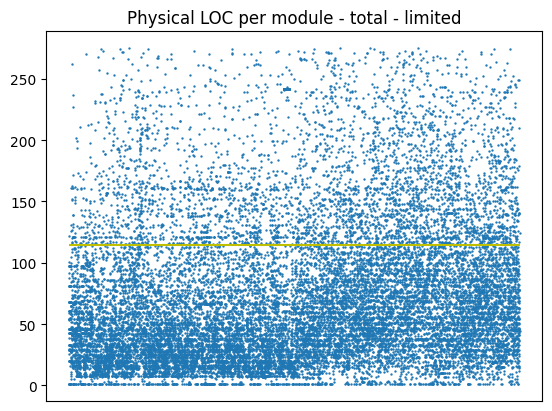

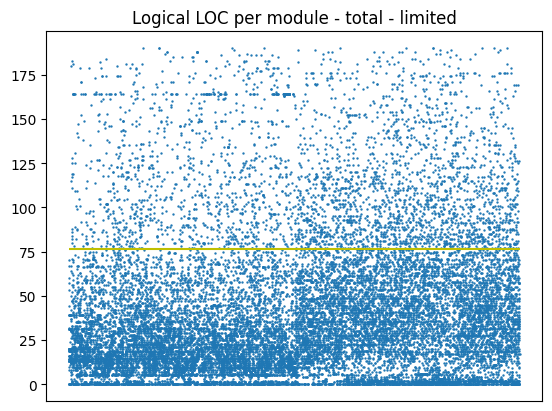

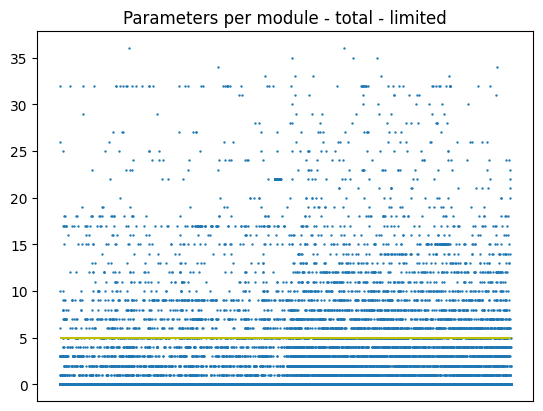

In [123]:
limit_phys_loc = round(df_total_module["sloc_physical_mod_list"].quantile(0.95))
limit_log_loc = round(df_total_module["sloc_logical_mod_list"].quantile(0.95))
limit_param = round(df_total_module["param_mod_list"].quantile(0.99))

scatter_plot_top_limit(df_total_module, 'sloc_physical_mod_list', "Physical LOC per module - total - limited", limit=limit_phys_loc)
scatter_plot_top_limit(df_total_module, 'sloc_logical_mod_list', "Logical LOC per module - total - limited", limit=limit_log_loc)
scatter_plot_top_limit(df_total_module, 'param_mod_list', "Parameters per module - total - limited", limit=limit_param)

## Functions

### Created

In [40]:
df_created_func = pd.read_csv("../analysis/cr/csvs/created_loc_param_func.csv", index_col=0)
df_created_func

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
0,9,6,0
1,9,1,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
45146,67,55,2
45147,7,5,0
45148,5,3,0
45149,4,2,0


In [41]:
df_created_func.describe().round(2)

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
count,45151.00,45151.00,45151.00
mean,19.36,13.18,0.76
std,109.13,84.65,1.48
min,1.00,0.00,0.00
25%,3.00,2.00,0.00
50%,6.00,5.00,0.00
75%,17.00,12.00,1.00
max,10722.00,13465.00,18.00


In [42]:
#df_created_func.loc[df_created_func['sloc_physical_func_list'] > 10000] #(yes, its real)

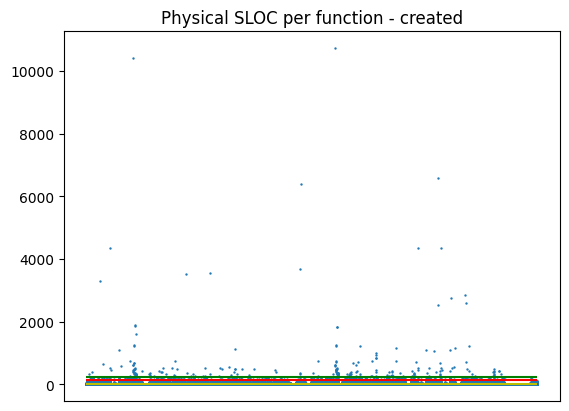

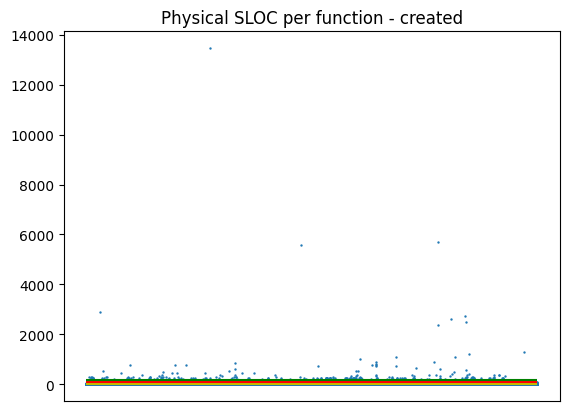

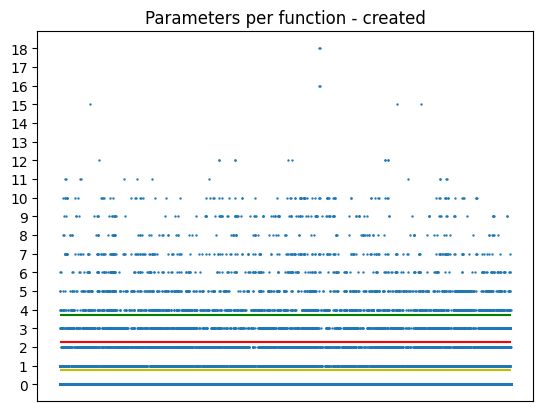

In [76]:
scatter_plot(df_created_func, 'sloc_physical_func_list', "Physical SLOC per function - created")
scatter_plot(df_created_func, 'sloc_logical_func_list', "Physical SLOC per function - created")
scatter_plot(df_created_func, 'param_func_list', "Parameters per function - created", ticks=list(range(19)))

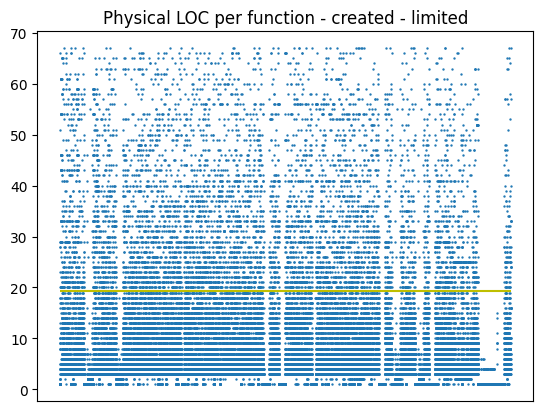

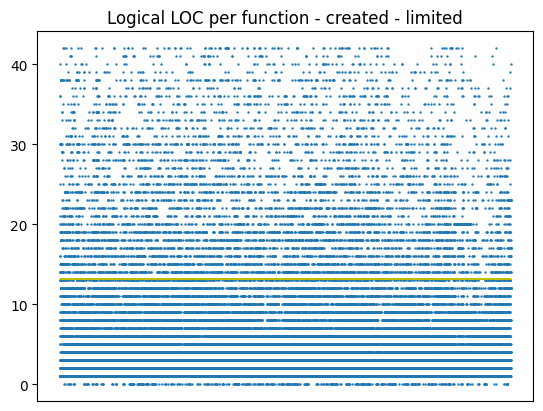

In [116]:
limit_phys_loc = round(df_created_func["sloc_physical_func_list"].quantile(0.95))
limit_log_loc = round(df_created_func["sloc_logical_func_list"].quantile(0.95))

scatter_plot_top_limit(df_created_func, 'sloc_physical_func_list', "Physical LOC per function - created - limited", limit=limit_phys_loc)
scatter_plot_top_limit(df_created_func, 'sloc_logical_func_list', "Logical LOC per function - created - limited", limit=limit_log_loc)

### Hearted

In [53]:
df_hearted_func = pd.read_csv("../analysis/cr/csvs/hearted_loc_param_func.csv", index_col=0)
df_hearted_func

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
0,7,5,0
1,6,4,0
2,31,3,3
3,21,18,3
4,7,5,0
...,...,...,...
78040,9,6,0
78041,28,5,0
78042,3,1,0
78043,8,9,0


In [54]:
d = df_hearted_func.describe().round(2)
d

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
count,78045.00,78045.00,78045.00
mean,22.38,11.85,1.05
std,267.66,125.38,1.52
min,1.00,0.00,0.00
25%,2.00,2.00,0.00
50%,6.00,5.00,0.00
75%,17.00,12.00,2.00
max,47549.00,27827.00,18.00


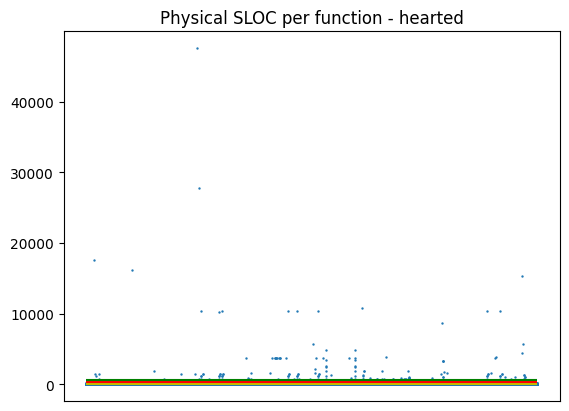

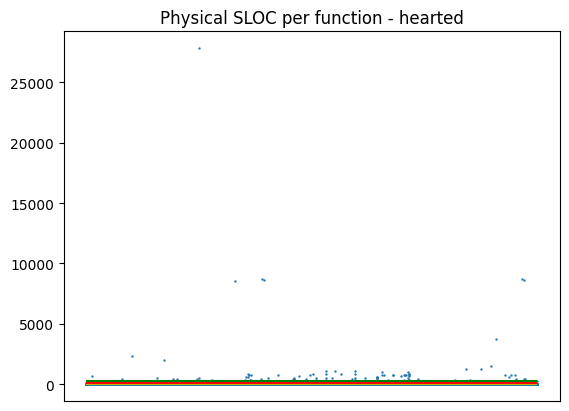

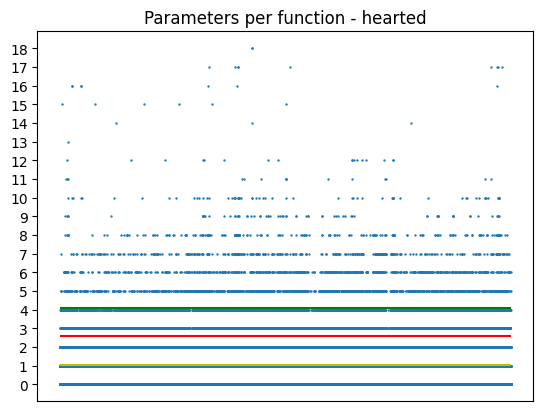

In [56]:
scatter_plot(df_hearted_func, 'sloc_physical_func_list', "Physical SLOC per function - hearted")
scatter_plot(df_hearted_func, 'sloc_logical_func_list', "Physical SLOC per function - hearted")
scatter_plot(df_hearted_func, 'param_func_list', "Parameters per function - hearted", ticks=list(range(19)))

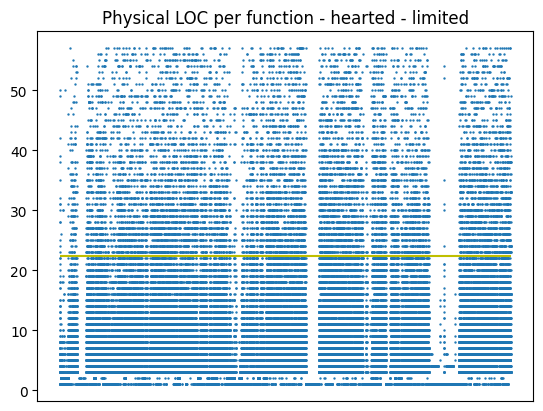

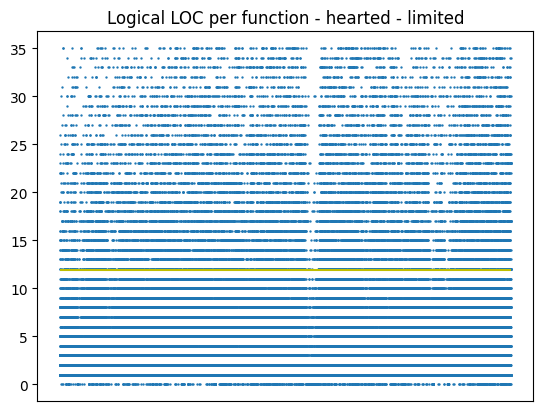

In [124]:
limit_phys_loc = round(df_hearted_func["sloc_physical_func_list"].quantile(0.95))
limit_log_loc = round(df_hearted_func["sloc_logical_func_list"].quantile(0.95))

scatter_plot_top_limit(df_hearted_func, 'sloc_physical_func_list', "Physical LOC per function - hearted - limited", limit=limit_phys_loc)
scatter_plot_top_limit(df_hearted_func, 'sloc_logical_func_list', "Logical LOC per function - hearted - limited", limit=limit_log_loc)

### Total

In [57]:
df_total_func = pd.read_csv("../analysis/cr/csvs/total_loc_param_func.csv", index_col=0)
df_total_func

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
0,9,6,0
1,9,1,0
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
123191,9,6,0
123192,28,5,0
123193,3,1,0
123194,8,9,0


In [58]:
df_total_func.describe().round(2)

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
count,123196.00,123196.00,123196.00
mean,21.28,12.33,0.94
std,223.05,112.18,1.52
min,1.00,0.00,0.00
25%,3.00,2.00,0.00
50%,6.00,5.00,0.00
75%,17.00,12.00,1.00
max,47549.00,27827.00,18.00


In [59]:
df_total_func.mode()

,sloc_physical_func_list,sloc_logical_func_list,param_func_list
0,1,1,0


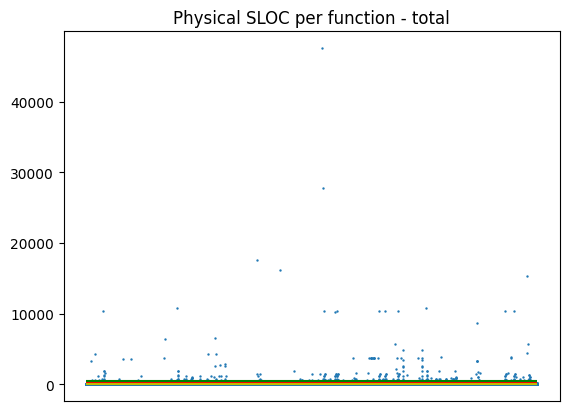

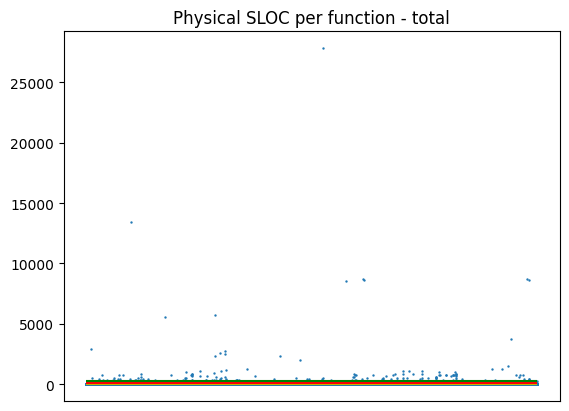

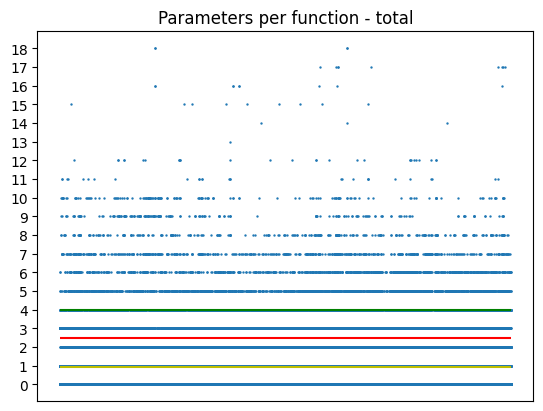

In [62]:
scatter_plot(df_total_func, 'sloc_physical_func_list', "Physical SLOC per function - total")
scatter_plot(df_total_func, 'sloc_logical_func_list', "Physical SLOC per function - total")
scatter_plot(df_total_func, 'param_func_list', "Parameters per function - total", ticks=list(range(19)))

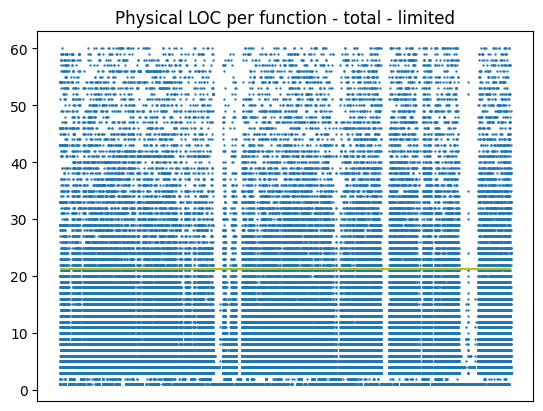

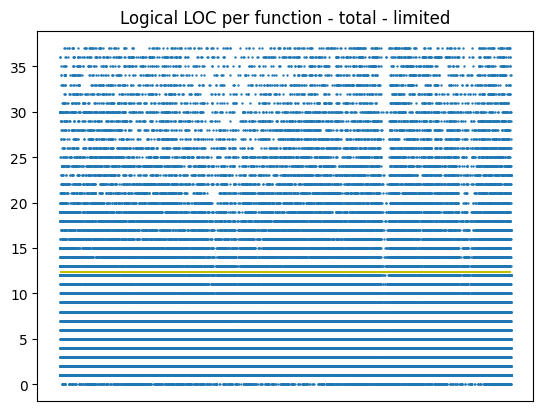

In [125]:
limit_phys_loc = round(df_total_func["sloc_physical_func_list"].quantile(0.95))
limit_log_loc = round(df_total_func["sloc_logical_func_list"].quantile(0.95))

scatter_plot_top_limit(df_total_func, 'sloc_physical_func_list', "Physical LOC per function - total - limited", limit=limit_phys_loc)
scatter_plot_top_limit(df_total_func, 'sloc_logical_func_list', "Logical LOC per function - total - limited", limit=limit_log_loc)